# Sinais exponenciais

Neste notebook avaliaremos os sinais exponenciais do tipo

\begin{equation}
x(t) = A \ \mathrm{e}^{a \ t}
\end{equation}

Estamos interessados em 3 casos:

1. $A \ \in \ \mathbb{R}$ e $a \ \in \ \mathbb{R}$  - As exponenciais reais.

2. $A \ \in \ \mathbb{C}$ e $a \ \in \ \mathbb{C}, \ \mathrm{Re}\left\{a\right\} = 0$   - As exponenciais complexas.

3. $A \ \in \ \mathbb{C}$ e $a \ \in \ \mathbb{C}, \ \mathrm{Re}\left\{a\right\} < 0$

In [2]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

## 1. $A \ \in \ \mathbb{R}$ e $a \ \in \ \mathbb{R}$  - As exponenciais reais.

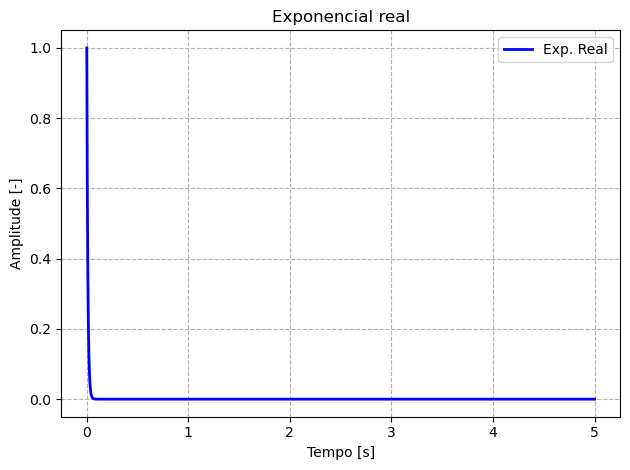

In [7]:
# Sinal
t = np.linspace(0, 5, 1000) # vetor temporal
A = 1
a = -100

xt = A*np.exp(a*t)

# Figura
plt.figure()
plt.title('Exponencial real')
plt.plot(t, xt, '-b', linewidth = 2, label = 'Exp. Real')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

In [8]:
xt[-1]

7.124576406741286e-218

## 2. $A \ \in \ \mathbb{C}$ e $a \ \in \ \mathbb{C}, \ \mathrm{Re}\left\{a\right\} = 0$   - As exponenciais complexas.

Temos grande interesse neste caso. Ele está relacionado ao sinal

\begin{equation}
x(t) = A \ \mathrm{cos}(2 \pi f t - \phi) = A \ \mathrm{cos}(\omega t - \phi).
\end{equation}

A relação de Euler nos diz que:

\begin{equation}
\mathrm{cos}(\omega t - \phi) = \mathrm{Re}\left\{\mathrm{e}^{\mathrm{j}(\omega t-\phi)}    \right\} .
\end{equation}

Assim, o sinal $x(t)$ torna-se:

\begin{equation}
x(t) = A \ \mathrm{cos}(\omega t - \phi) = A\mathrm{Re}\left\{\mathrm{e}^{\mathrm{j}(\omega t-\phi)}    \right\} = \mathrm{Re}\left\{A \mathrm{e}^{\mathrm{j}(\omega t-\phi)}    \right\}
\end{equation}

\begin{equation}
x(t) = \mathrm{Re}\left\{A\mathrm{e}^{-\mathrm{j}\phi} \ \mathrm{e}^{\mathrm{j}\omega t}    \right\}
\end{equation}
em que $\tilde{A} = A\mathrm{e}^{-\mathrm{j}\phi}$ é a amplitude complexa do cosseno e contêm as informações de magnitude, $A$, e fase, $\phi$.

No handles with labels found to put in legend.


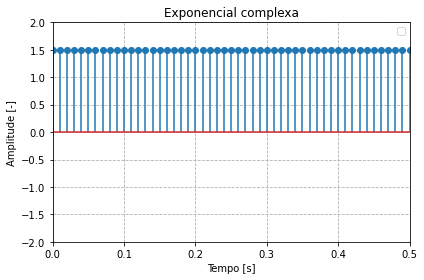

In [64]:
# Sinal
t = np.arange(0, 3, 0.01)#np.linspace(-2, 2, 1000) # vetor temporal

f=100
w = 2*np.pi*f
a = 1j*w

A = 1.5
phi = 0 #w*0.25
A = A*np.exp(-1j*phi)


xt = np.real(A*np.exp(a*t))

# Figura
plt.figure()
plt.title('Exponencial complexa')
#plt.plot(t, xt, '-b', linewidth = 2, label = 'Exp. complexa')
plt.stem(t, xt)
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.ylim((-2, 2))
plt.xlim((0, 0.5))
plt.tight_layout()
plt.show()

3. $A \ \in \ \mathbb{C}$ e $a \ \in \ \mathbb{C}, \ \mathrm{Re}\left\{a\right\} < 0$

Neste caso, se $a \ \in \ \mathbb{C}$ e  $\mathrm{Re}\left\{a\right\} < 0$, teremos um sinal oscilatório, cuja amplitude decai com o tempo. É típico de um sistema massa-mola-amortecedor.

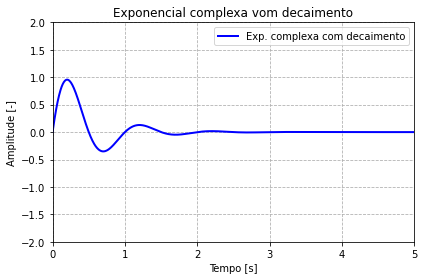

In [28]:
# Sinal
t = np.linspace(0, 5, 1000) # vetor temporal


f=1
w = 2*np.pi*f
a = -2+1j*w

A = 1.5
phi = w*0.25
A = A*np.exp(-1j*phi)

xt = np.real(A*np.exp(a*t))

# Figura
plt.figure()
plt.title('Exponencial complexa vom decaimento')
plt.plot(t, xt, '-b', linewidth = 2, label = 'Exp. complexa com decaimento')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.ylim((-2, 2))
plt.xlim((0, t[-1]))
plt.tight_layout()
plt.show()

## Exponenciais complexas em sinais discretos

Retomamos agora as exponenciais complexas e discretas. Lembramos que para um sinal contínuo,  $x(t)=\mathrm{e}^{\mathrm{j} \omega t}$, a taxa de oscilação aumenta quando $\omega$ aumenta. Para sinais discretos do tipo

\begin{equation}
x[n] = \mathrm{e}^{\mathrm{j}  \omega  n} 
\end{equation}
veremos um aumento da taxa de oscilação para $0 \leq \omega < \pi$ e uma diminuição da taxa de oscilação para  $\pi \leq \omega \leq 2 \pi$. Isto se relacionará depois com a amostragem de sinais. Veremos que para amostrar um sinal corretamente (representar bem suas componentes de frequência), precisaremos usar uma taxa de amostragem que seja pelo menos o dobro da maior frequência contida no sinal a ser amostrado.


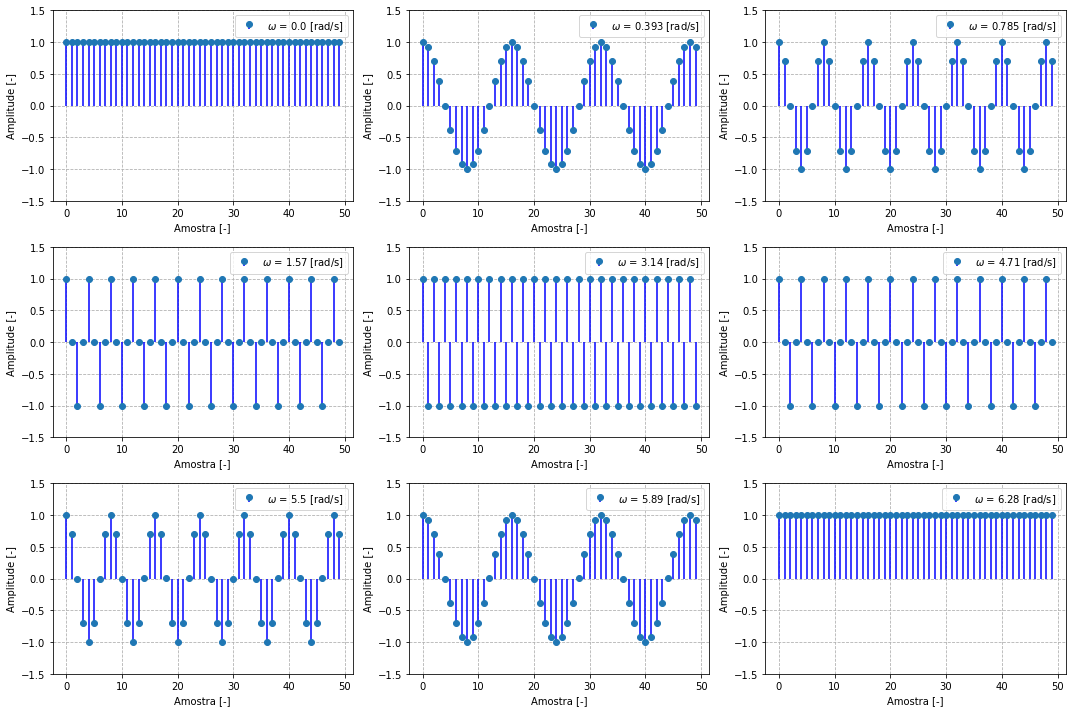

In [7]:
omega = [0, np.pi/8, np.pi/4, np.pi/2, np.pi, 
         3*np.pi/2, 7*np.pi/4, 15*np.pi/8, 2*np.pi]#np.linspace(0, 2*np.pi, 9) # Frequencias angulares
n = np.arange(50) # amostras

plt.figure(figsize=(15,10))
for jw,w in enumerate(omega):
    xn = np.real(np.exp(1j*w*n))
    
    plt.subplot(3,3,jw+1)
    plt.stem(n, xn, '-b', label = r'$\omega$ = {:.3} [rad/s]'.format(float(w)), basefmt=" ", use_line_collection=  True)
    plt.legend(loc = 'upper right')
    plt.grid(linestyle = '--', which='both')
    plt.xlabel('Amostra [-]')
    plt.ylabel('Amplitude [-]')
    plt.ylim((-1.5, 1.5))
    plt.tight_layout()
    
plt.show()

In [41]:
omega = 2*np.pi
n = np.arange(0, 50)

In [42]:
xn = np.real(np.exp(1j*omega*n))

<StemContainer object of 3 artists>

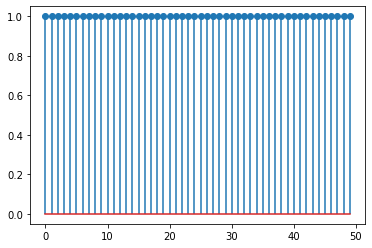

In [43]:
plt.figure()
plt.stem(n, xn)

In [9]:
n

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])